In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as nx
import seaborn as sns
import missingno

In [2]:
df = pd.read_csv("/Users/connor/Desktop/Data Science Projects/NASA Meteorite Landings/Meteorite_Landings.csv")

In [6]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  States       1659 non-null   float64
 11  Counties     1659 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


In [9]:
# See if the data has any missing values
missing = df.isnull().sum()
missing

name               0
id                 0
nametype           0
recclass           0
mass (g)         131
fall               0
year             291
reclat          7315
reclong         7315
GeoLocation     7315
States         44057
Counties       44057
dtype: int64

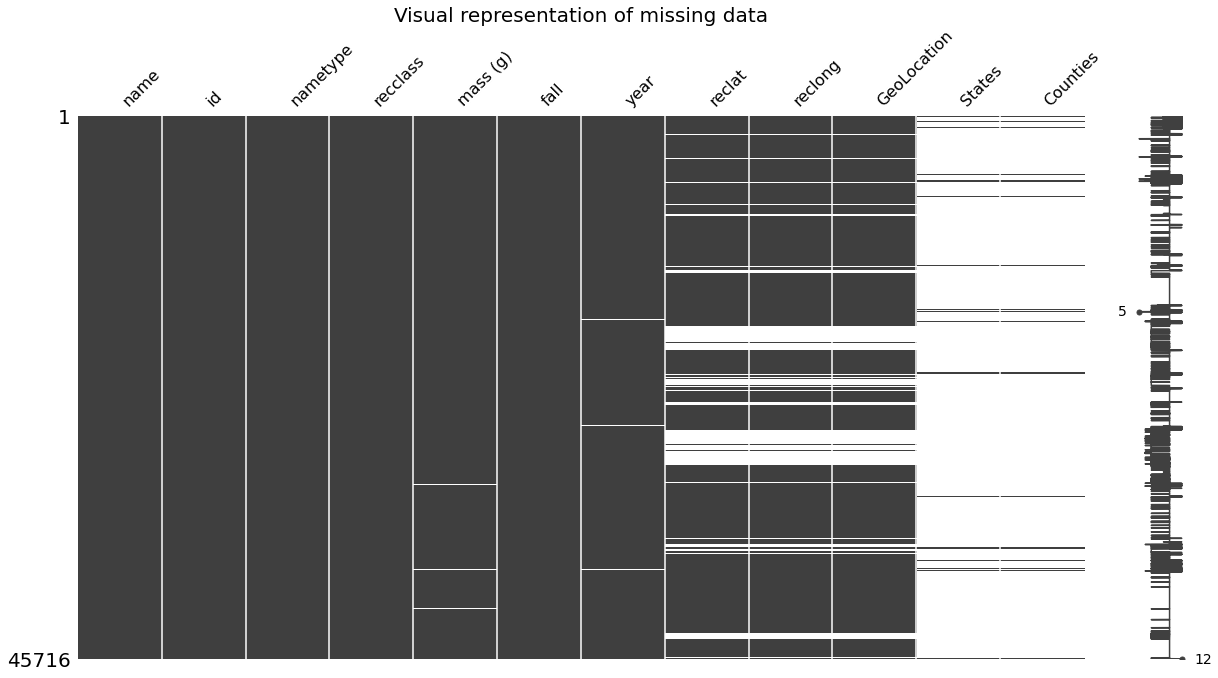

In [10]:
# Visual representation of missing data
missingno.matrix(df, figsize = (20,10))
plt.title('Visual representation of missing data', fontsize=20)
plt.show()

After examining the dataset, it has become apparent that a couple of columns are completely redundant, and some other columns contain a significant amount of missing data. To remedy this situation, I intend to remove any rows that have null values, along with the 'States' and 'Counties' columns to optimize the dataset. Additionally, I plan to rename the 'reclat' and 'reclong' columns to make them easier to understand. Furthermore, since we already have columns for latitude and longitude, I will eliminate the 'GeoLocation' column to avoid redundancy.

In [12]:
# Drop redundant columns
df1 = df.drop(['States','Counties','GeoLocation'], axis=1)
df1

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


In [22]:
# drop all rows containing null values
df1 = df1.dropna()

# verify that all rows with null values are removed
print(df1.isnull().sum())

name        0
id          0
nametype    0
recclass    0
mass (g)    0
fall        0
year        0
reclat      0
reclong     0
dtype: int64


In [23]:
# Rename columns
df2 = df1.rename(columns = {'reclat' : 'latitude', 'reclong' : 'logitude', })
df2

,name,id,nametype,recclass,mass (g),fall,year,latitude,logitude
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460
